In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

%matplotlib inline

In [49]:
sns.set_theme(style='whitegrid')

In [2]:
dif_resolution_df = pd.read_csv('5_task_1.csv')

In [3]:
dif_button_df = pd.read_csv('5_task_2.csv')

In [4]:
dif_resolution_df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
dif_button_df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [9]:
#Проверяем равны ли дисперсии в 3 разных группах
sp.stats.levene(dif_resolution_df.query('group == "A"').events,
                dif_resolution_df.query('group == "B"').events,
                dif_resolution_df.query('group == "C"').events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [11]:
#Делаем выборки из каждой группы, чтобы проверить на нормальность
#Ибо тест Шапиро-Уилка может давать ошибку при большом количестве данных из-за выбросов
sample_A = dif_resolution_df.query('group == "A"').events.sample(1000, random_state=17)
sample_B = dif_resolution_df.query('group == "B"').events.sample(1000, random_state=17)
sample_C = dif_resolution_df.query('group == "C"').events.sample(1000, random_state=17)


In [12]:
sp.stats.shapiro(sample_A)

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [13]:
sp.stats.shapiro(sample_B)

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [14]:
sp.stats.shapiro(sample_C)

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [15]:
#Все распределения нормальные

In [19]:
#Используем однофакторный дисперсионный анализ для того, чтобы определить
#Есть ли между группами(всеми) статистически значимые различия
sp.stats.f_oneway(dif_resolution_df.query('group == "A"').events,
                  dif_resolution_df.query('group == "B"').events,
                  dif_resolution_df.query('group == "C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [20]:
#Используя критерий Тьюки, определяем между какими группами есть различие

In [29]:
#Первый способ
print(sm.stats.multicomp.pairwise_tukeyhsd(dif_resolution_df.events, dif_resolution_df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [30]:
#Второй способ
MultiComp = sm.stats.multicomp.MultiComparison(dif_resolution_df.events, dif_resolution_df.group)

In [32]:
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [33]:
#Есть статистически значимые отличия между всеми группами

In [38]:
#Значит можем взять самое большое среднее
#Оно будет статистически больше остальных
dif_resolution_df.groupby('group') \
                 .agg({'events': 'mean'})

,events
group,
A,29.5796
B,37.6136
C,27.4703


In [39]:
#Переходим к анализу df с разными кнопками

In [40]:
dif_button_df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [41]:
dif_button_df.segment.unique()

array(['high', 'low'], dtype=object)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events'>

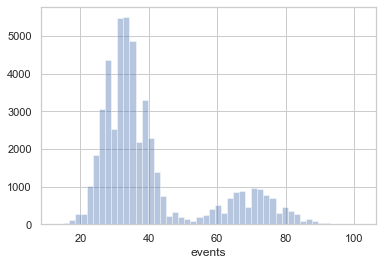

In [53]:
sns.distplot(dif_button_df.query('group == "test"').events, kde=False)



<AxesSubplot:xlabel='events'>

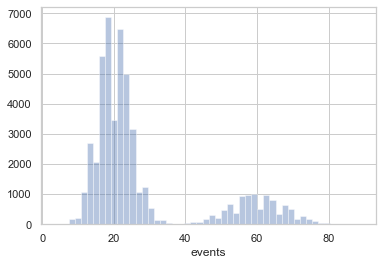

In [54]:
sns.distplot(dif_button_df.query('group == "control"').events, kde=False)


In [55]:
#Считаем среднее, медиану и стандратное отклонение с разбивкой по сегменту и группе

In [59]:
dif_button_df.query('group == "control" & segment == "low"').events.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

In [60]:
dif_button_df.query('group == "control" & segment == "high"').events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [61]:
dif_button_df.query('group == "test" & segment == "low"').events.describe()

count    40000.000000
mean        33.025925
std          5.720845
min         13.000000
25%         29.000000
50%         33.000000
75%         37.000000
max         59.000000
Name: events, dtype: float64

In [62]:
dif_button_df.query('group == "test" & segment == "high"').events.describe()

count    10000.000000
mean        69.938500
std          8.403974
min         40.000000
25%         64.000000
50%         70.000000
75%         76.000000
max        102.000000
Name: events, dtype: float64

In [63]:
#Используем многофакторный дисперсионный анализ для опеределения различий

In [76]:
MultiComp_but = sm.stats.multicomp.MultiComparison(dif_button_df.events, dif_button_df.combination)

In [77]:
print(MultiComp_but.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


In [69]:
dif_button_df['combination'] = dif_button_df.group + '/' + dif_button_df.segment

In [72]:
formula = 'events ~ segment + group + segment:group'
model = sm.formula.ols(formula, dif_button_df).fit()

In [74]:
aov_table = sm.stats.anova_lm(model, typ=2)

In [75]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [78]:
#Визуализация

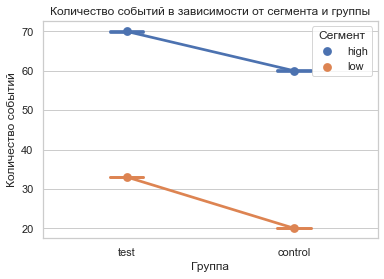

In [86]:
sns.pointplot(x='group', y='events', hue='segment', data=dif_button_df, capsize=0.2)
plt.title('Количество событий в зависимости от сегмента и группы')
plt.xlabel('Группа')
plt.ylabel('Количество событий')
plt.legend(title='Сегмент')